# Analyse the impact of the data assimilation

In [1]:
# import packages
import xarray as xr
import math
import numpy as np
import cartopy as cy
from matplotlib import pyplot as plt
from cmcrameri import cm


#### Fill in the dates and hours for the exercise

In [2]:
year =  ''
day  =  ''
month = ''

hour_1  =''
hour_2  =''



url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [3]:
def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    x=int(x)
    y=int(y)
   
    return (x,y)

In [4]:
[ix,jx] = findindex(forecast_1['latitude'],forecast_1['longitude'],78.24,15.46) # For example for Longyearbyen

#### For example temperature forecasts at a specific model level

In [5]:
mlevel=64
tml_point_forecast_1 = forecast_1['air_temperature_ml'].isel(hybrid=mlevel, y = ix, x=jx)
tml_point_forecast_2 = forecast_2['air_temperature_ml'].isel(hybrid=mlevel, y = ix, x=jx)

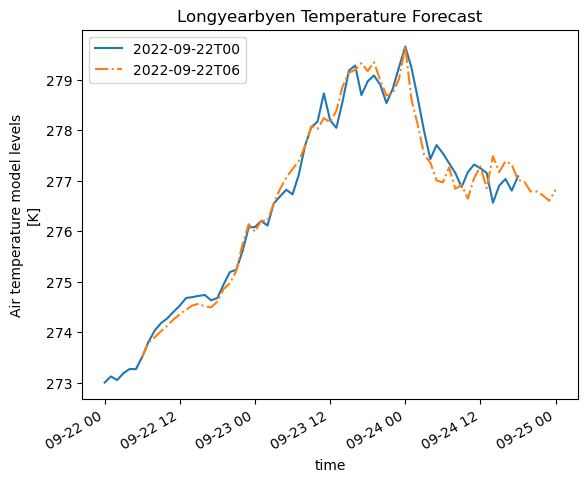

In [6]:
tml_point_forecast_1.plot.line(x='time', linestyle='-', label=(np.datetime_as_string(tml_point_forecast_1.time.isel(time=0), unit='h')))
tml_point_forecast_2.plot.line(x='time', linestyle='-.', label=(np.datetime_as_string(tml_point_forecast_2.time.isel(time=0), unit='h')))
plt.legend()
plt.title("Longyearbyen Temperature Forecast");


### Plot forecast on a map

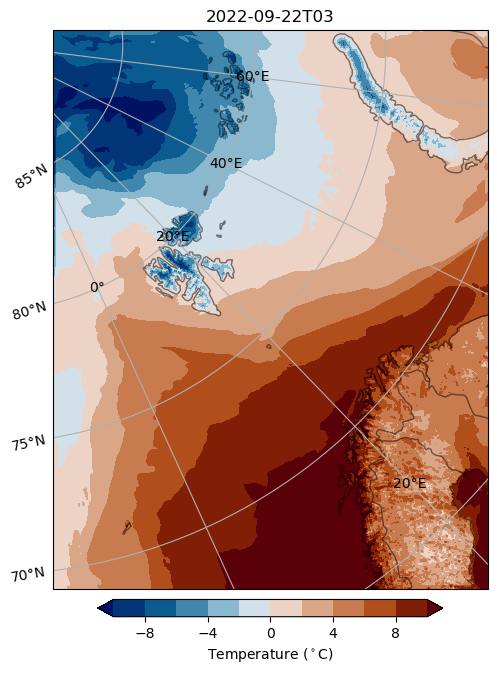

In [7]:
timestep_1=3

projection = cy.crs.LambertConformal(central_longitude =forecast_1.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =forecast_1.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = forecast_1.projection_lambert.standard_parallel)


f, ax = plt.subplots(1,1, subplot_kw={'projection':projection}, figsize=[7.2, 7.2])

# plot cosmetics
ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
ax.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False


(forecast_1['air_temperature_ml'].isel(time=timestep_1, hybrid=mlevel) - 273.15).plot.contourf(ax=ax, 
                                                                                               x='longitude', 
                                                                                               y='latitude', 
                                                                                               cmap=cm.vik, 
                                                                                               extend='both', 
                                                                                               transform=cy.crs.PlateCarree(),
                                                                                               levels=np.arange(-10,12,2),
                                                                                               cbar_kwargs={'orientation':'horizontal','label':'Temperature ($^\circ$C)', 'shrink':0.5, 'pad':0.015})
ax.set(title= np.datetime_as_string(forecast_1.time.isel(time=timestep_1), unit='h'))

plt.tight_layout()